In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [64]:
data = pd.read_csv('Dataset.csv')
data
# parse_dates=True,index_col='Date'

Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  3423509          7999.55  
...                    ...              ...  
2030                586100           694.98  
2031                658440           780.01  
2032                281312           340.31  
2033                293312           355.17  
2034                658666           803.56  

[2035 rows x 8 columns]

In [65]:
data.head()

Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
1  2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2  2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
3  2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
4  2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   

   Turnover (Lacs)  
0          7162.35  
1         11859.95  
2          5248.60  
3          5503.90  
4          7999.55

In [66]:
data['Turnover (Lacs)'].sum()

7936460.45

In [67]:
data['Close'].min()

80.95

In [68]:
data['Close'].max()

325.75

In [69]:
data.shape

(2035, 8)

## Statistical Analaysis

In [70]:
Start_date = data.index.min()
Last_date = data.index.max()

print(Start_date)
print(Last_date)

0
2034


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [72]:
data.describe()

Open         High          Low         Last       Close  \
count  2035.000000  2035.000000  2035.000000  2035.000000  2035.00000   
mean    149.713735   151.992826   147.293931   149.474251   149.45027   
std      48.664509    49.413109    47.931958    48.732570    48.71204   
min      81.100000    82.800000    80.000000    81.000000    80.95000   
25%     120.025000   122.100000   118.300000   120.075000   120.05000   
50%     141.500000   143.400000   139.600000   141.100000   141.25000   
75%     157.175000   159.400000   155.150000   156.925000   156.90000   
max     327.700000   328.750000   321.650000   325.950000   325.75000   

       Total Trade Quantity  Turnover (Lacs)  
count          2.035000e+03      2035.000000  
mean           2.335681e+06      3899.980565  
std            2.091778e+06      4570.767877  
min            3.961000e+04        37.040000  
25%            1.146444e+06      1427.460000  
50%            1.783456e+06      2512.030000  
75%            2.813594e+06      4539.015000  
max            2.919102e+07     55755.080000

In [73]:
# data.corr()

## Data Proprocessing

Duplicates

In [74]:
data.duplicated().sum()

0

Null Values

In [75]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

<Axes: >

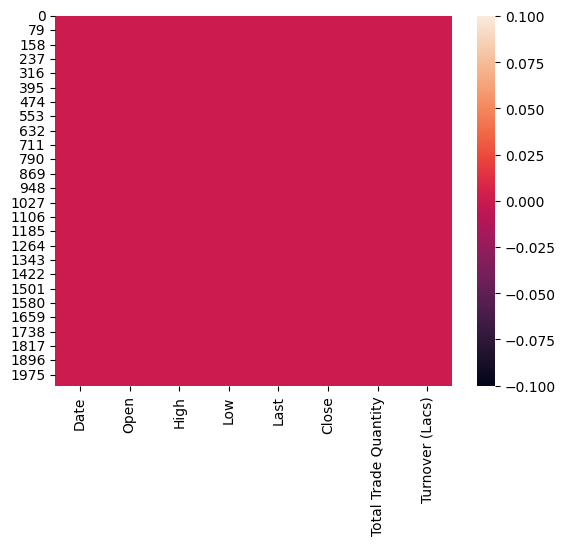

In [76]:
sns.heatmap(data.isnull())

Outliers

[Text(0, 0, 'Open'),
 Text(1, 0, 'High'),
 Text(2, 0, 'Low'),
 Text(3, 0, 'Last'),
 Text(4, 0, 'Close'),
 Text(5, 0, 'Total Trade Quantity'),
 Text(6, 0, 'Turnover (Lacs)')]

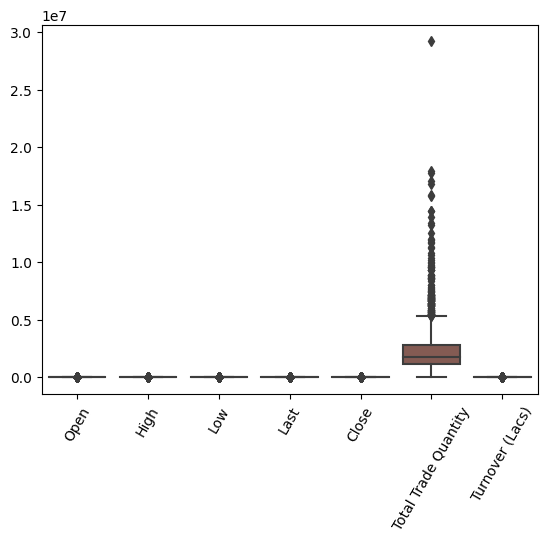

In [77]:
all = sns.boxplot(data=data)
all.set_xticklabels(all.get_xticklabels(),rotation=60)


Total Trade Quantity    Axes(0.125,0.53;0.352273x0.35)
dtype: object

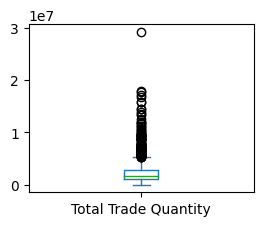

In [78]:
data['Total Trade Quantity'].plot(kind='box', subplots=True,layout=(2,2))


Text(0.5, 1.0, "['Total Trade Quantity']")

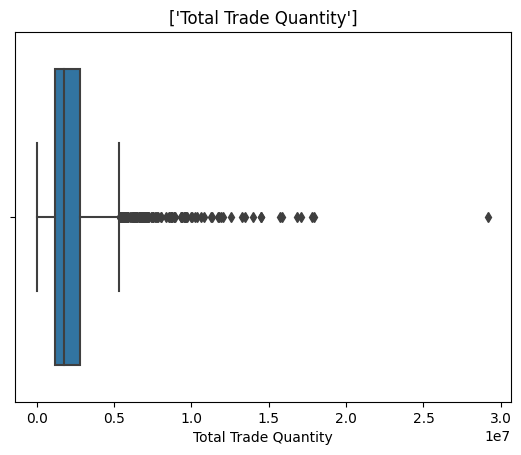

In [79]:
sns.boxplot(data=data,x=data['Total Trade Quantity'])
plt.title(["Total Trade Quantity"])

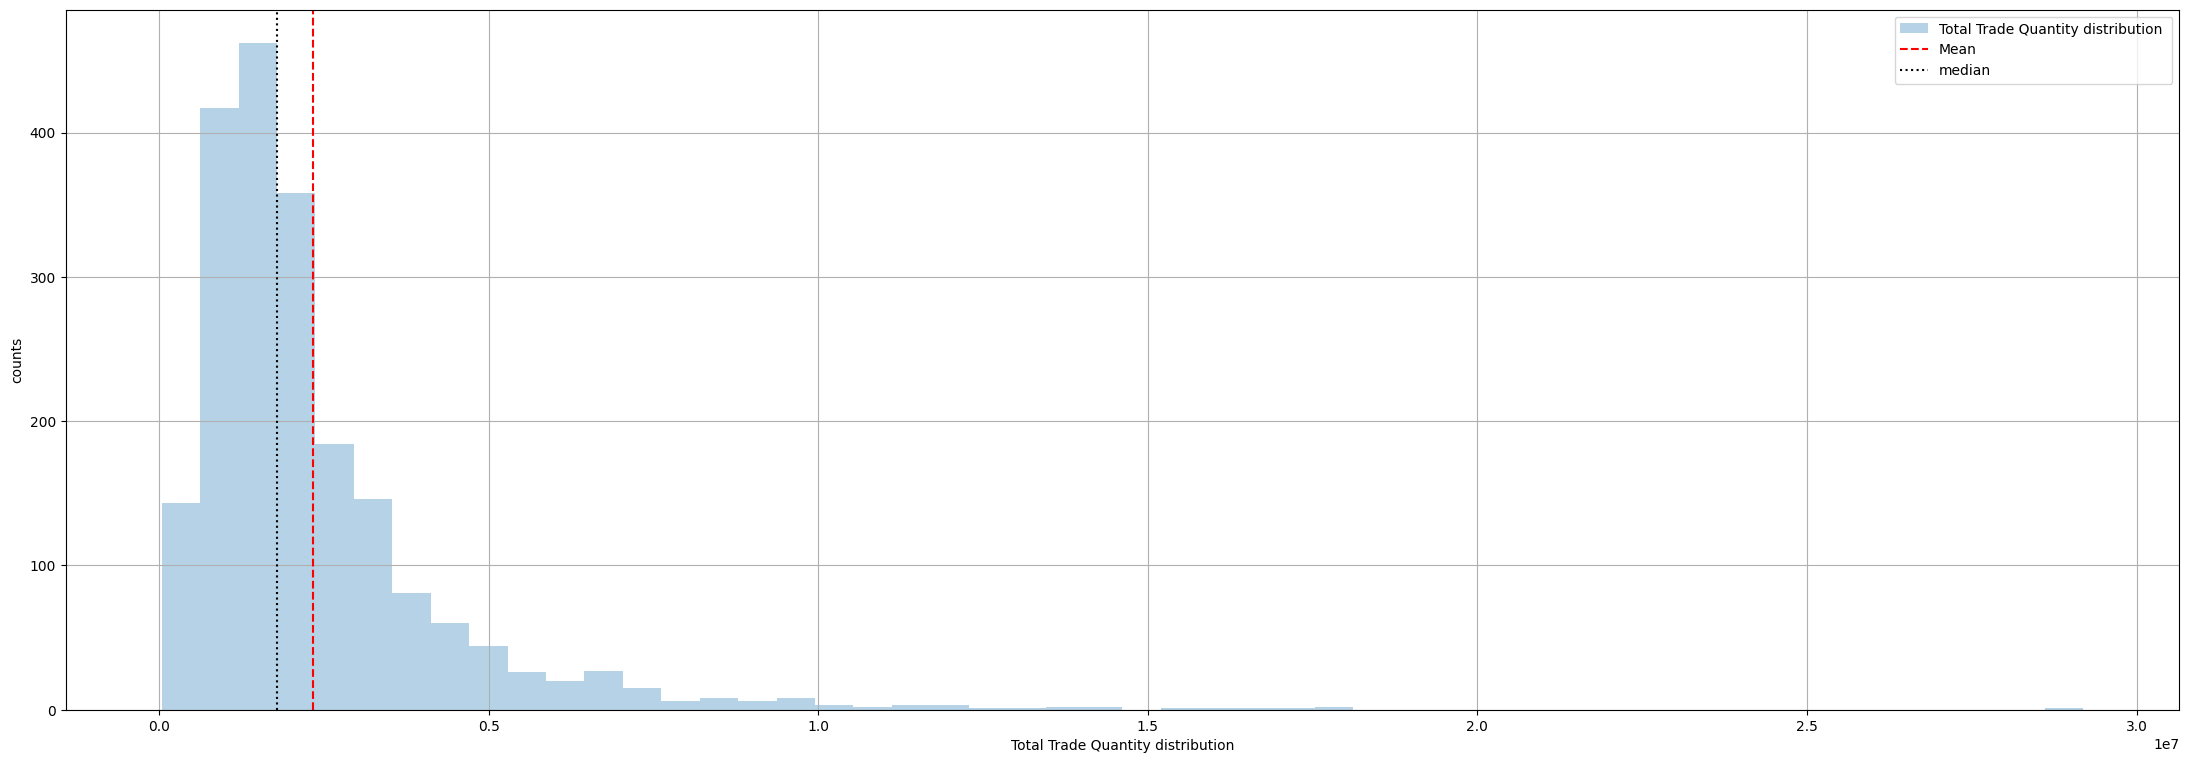

In [80]:
plt.figure(figsize=(60,20),facecolor='white',edgecolor='white',num=10)


plt.subplot(2,2,1)
data['Total Trade Quantity'].hist(bins=50,label='Total Trade Quantity distribution ',alpha=0.33)
plt.axvline(np.mean(data['Total Trade Quantity']),ls='--',c='r',label="Mean")
plt.axvline(np.median(data['Total Trade Quantity']),ls=':',c='black',label="median")


plt.ylabel('counts')
plt.xlabel('Total Trade Quantity distribution')
plt.legend()




<Axes: xlabel='Total Trade Quantity'>

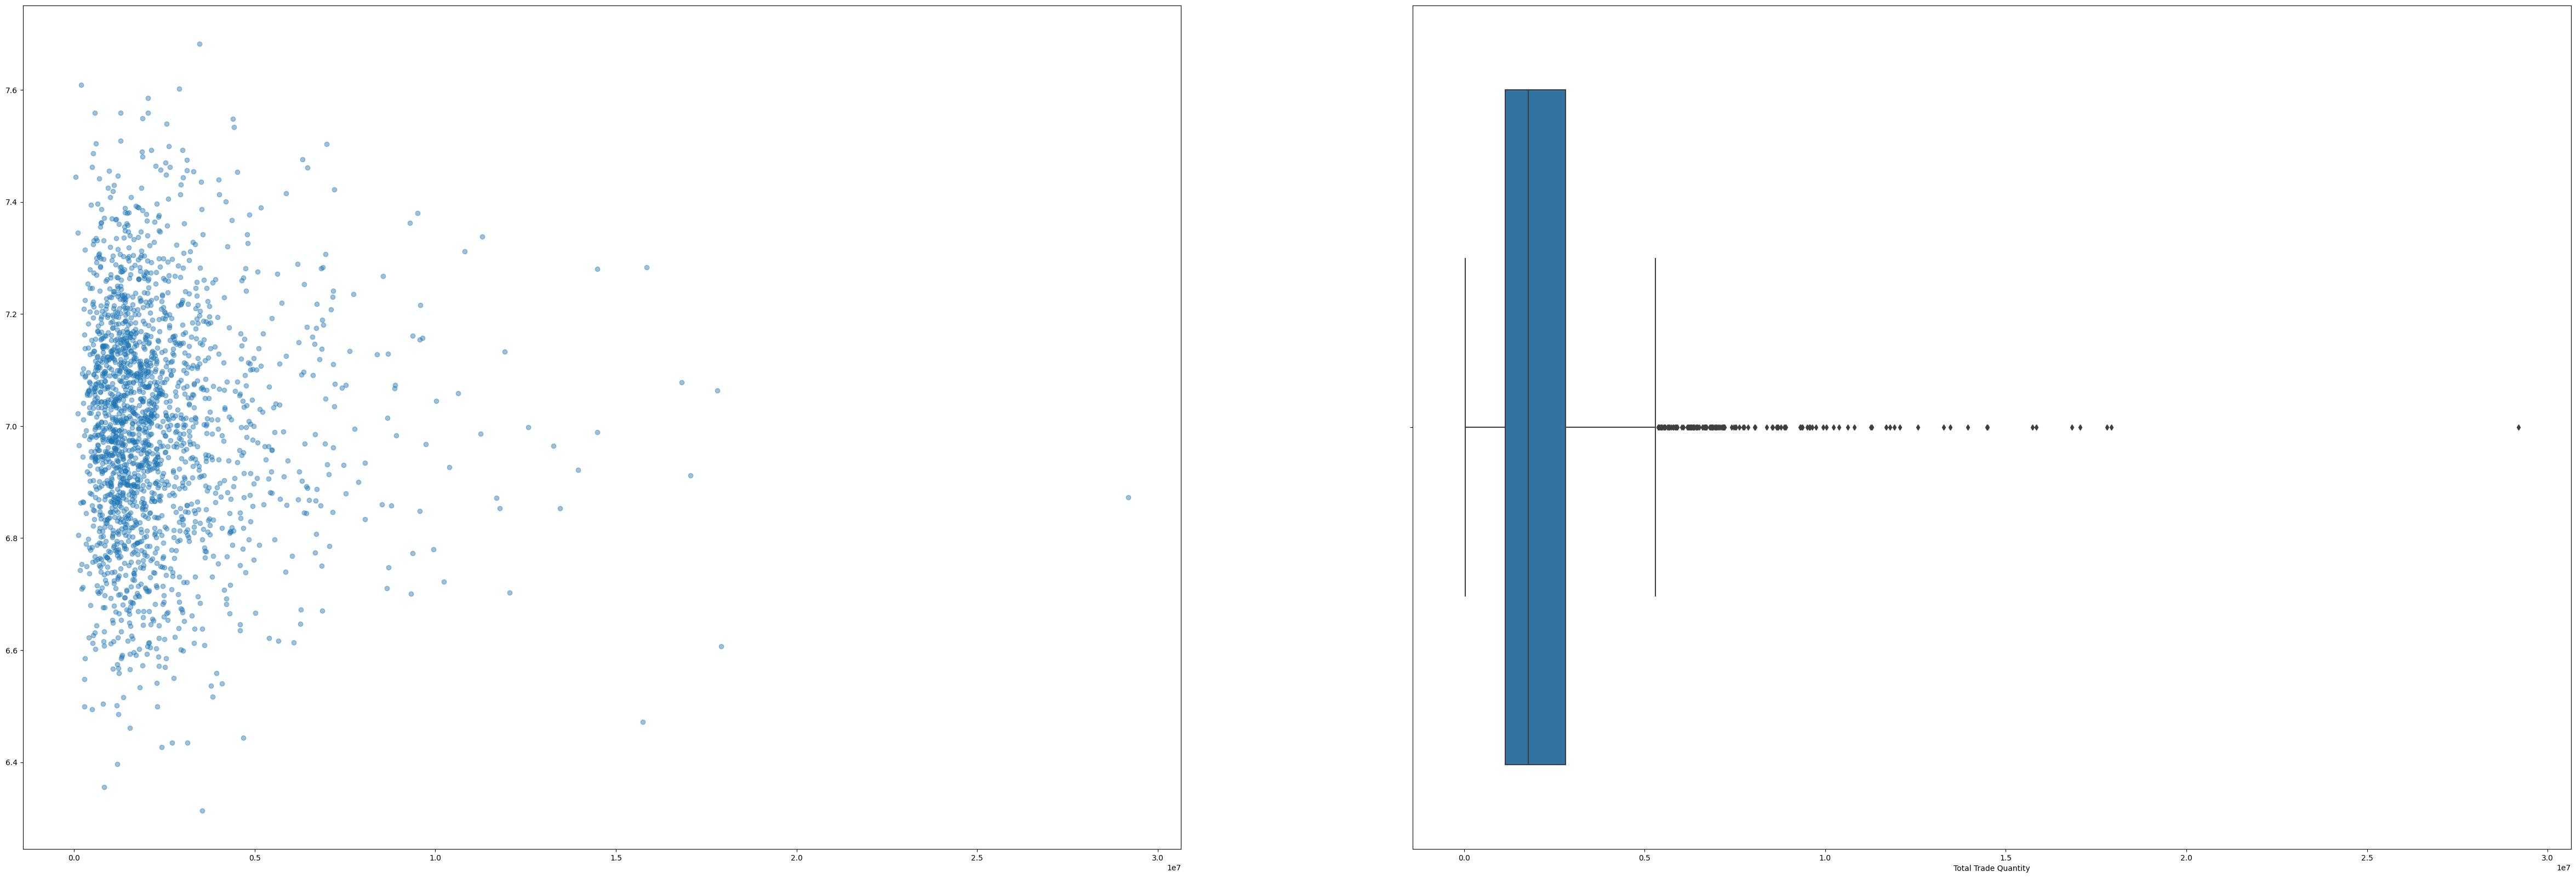

In [81]:
plt.figure(figsize=(60,20),facecolor='white',edgecolor='white',num=10)

plt.subplot(1,2,1)
plt.scatter(data['Total Trade Quantity'],np.random.normal(7,0.2,size=data.shape[0]),alpha=0.44)

plt.subplot(1,2,2)
sns.boxplot(x='Total Trade Quantity',data=data)

In [82]:
data['Close'].describe()

count    2035.00000
mean      149.45027
std        48.71204
min        80.95000
25%       120.05000
50%       141.25000
75%       156.90000
max       325.75000
Name: Close, dtype: float64

In [83]:
data['Close'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2035 entries, 0 to 2034
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
2035 non-null   float64
dtypes: float64(1)
memory usage: 16.0 KB


## Removing Outliers

In [84]:
# Quantiles : 
Q1 = data['Total Trade Quantity'].quantile(0.25)
Q3 = data['Total Trade Quantity'].quantile(0.75)
IQR = Q3 - Q1
print("Quantile 1 : ", Q1)
print("Quantile 3 : ", Q3)
print("IQR : ", IQR)

# Upper Quantile :
upper = Q3+1.5*IQR
print("Upper Quantile : ",upper)
# Lower Quantile : 
lower = Q1-1.5*IQR
print("Lower Quantile : ",lower)


Quantile 1 :  1146444.5
Quantile 3 :  2813594.0
IQR :  1667149.5
Upper Quantile :  5314318.25
Lower Quantile :  -1354279.75


In [85]:
upper_arr = np.where(data['Total Trade Quantity']>upper)[0]
lower_arr = np.where(data['Total Trade Quantity']<lower)[0]

print("Before Removing Outliers : ", data.shape)
data = data.drop(index=upper_arr)
data = data.drop(index=lower_arr)
print("After Removing Outliers : ", data.shape )

Before Removing Outliers :  (2035, 8)
After Removing Outliers :  (1896, 8)


Text(0.5, 1.0, "['Total Trade Quantity']")

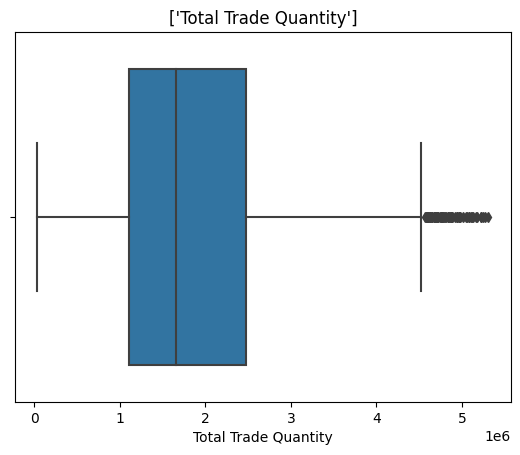

In [86]:
sns.boxplot(data=data,x=data['Total Trade Quantity'])
plt.title(["Total Trade Quantity"])

[Text(0, 0, 'Open'),
 Text(1, 0, 'High'),
 Text(2, 0, 'Low'),
 Text(3, 0, 'Last'),
 Text(4, 0, 'Close'),
 Text(5, 0, 'Total Trade Quantity'),
 Text(6, 0, 'Turnover (Lacs)')]

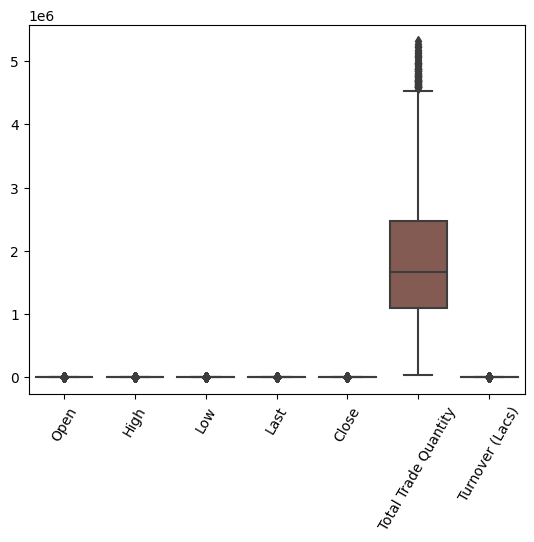

In [87]:
chart = sns.boxplot(data=data)
chart.set_xticklabels(chart.get_xticklabels(),rotation=60)

Skewness

In [88]:
skewness = data['Close'].skew()
print(skewness)

1.7261639290062123


C:\Users\Hunain\AppData\Local\Temp\ipykernel_6640\757464049.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Close'],color='g')


<Axes: xlabel='Close', ylabel='Density'>

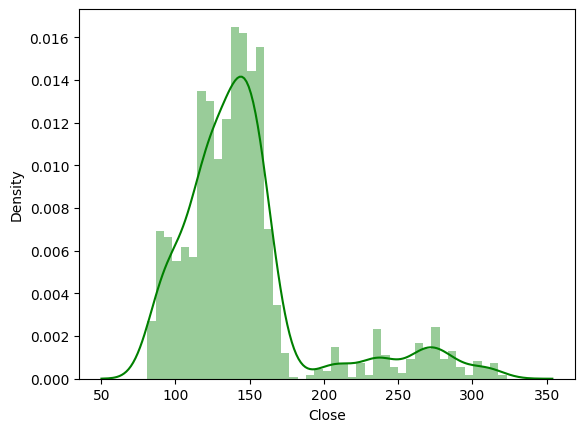

In [89]:
sns.distplot(data['Close'],color='g')

Normalize the Distribution

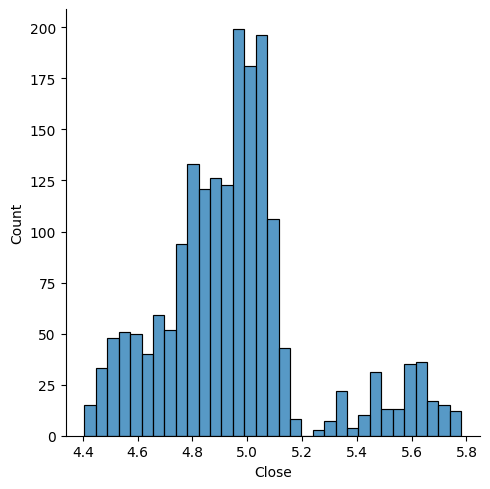

In [90]:
log_y = np.log1p(data['Close'])
sns.displot(log_y)


In [91]:
log_y.skew()

0.8407438858893567

Log1p Second time to Again and further normalize the distribution

In [92]:
log_y2 = np.log1p(log_y)
log_y2.skew()

0.6852303282196177

In [93]:
log_y3 = np.log1p(log_y)
log_y3.skew()
# Same Skewness as upper shows that it is skewed till its last.

0.6852303282196177

Scalling 

In [94]:
scaler = MinMaxScaler()
# Mix_max_scaling :
data["min_max_scaled"] = scaler.fit_transform(data['Total Trade Quantity'].values.reshape(-1,1))
# Standarization :
st_scaler = StandardScaler()
data['st_scaled'] = st_scaler.fit_transform(data['Total Trade Quantity'].values.reshape(-1,1))

print(data[['Total Trade Quantity','min_max_scaled','st_scaled']])



      Total Trade Quantity  min_max_scaled  st_scaled
0                  3069914        0.575308   1.063756
1                  5082859        0.957469   2.904318
2                  2240909        0.417920   0.305744
3                  2349368        0.438511   0.404915
4                  3423509        0.642439   1.387070
...                    ...             ...        ...
2030                586100        0.103752  -1.207352
2031                658440        0.117486  -1.141207
2032                281312        0.045888  -1.486038
2033                293312        0.048166  -1.475066
2034                658666        0.117529  -1.141000

[1896 rows x 3 columns]


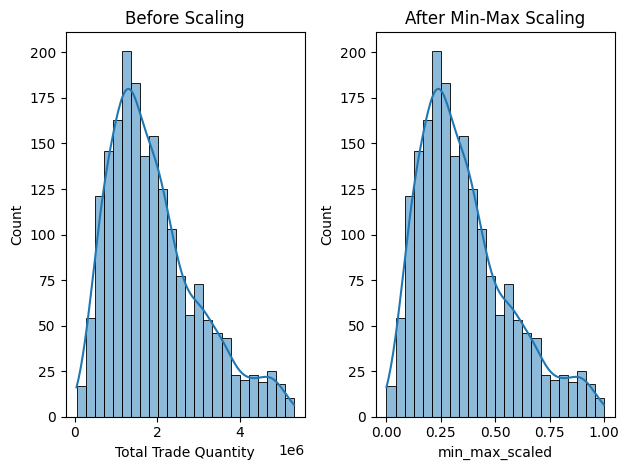

In [95]:
# Assuming df is your DataFrame and 'Volume' is the column you want to scale

# Before Scaling
plt.subplot(1, 2, 1)
sns.histplot(data['Total Trade Quantity'], kde=True)
plt.title('Before Scaling')

# After Min-Max Scaling
plt.subplot(1, 2, 2)
sns.histplot(data['min_max_scaled'], kde=True)
plt.title('After Min-Max Scaling')

plt.tight_layout()
plt.show()

Basically Closing Price the only thing through which prediction can takes place and more accurately it will predict

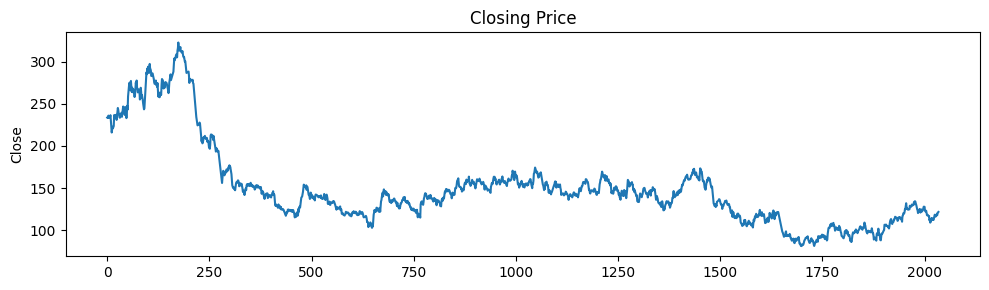

In [96]:
plt.figure(figsize=(10, 3))
data['Close'].plot()
plt.ylabel('Close')
plt.xlabel(None)
plt.title("Closing Price")

plt.tight_layout()

In [97]:
data.set_index('Date',inplace=True)

In [98]:
data.head()

Open    High     Low    Last   Close  Total Trade Quantity  \
Date                                                                       
2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   

            Turnover (Lacs)  min_max_scaled  st_scaled  
Date                                                    
2018-09-28          7162.35        0.575308   1.063756  
2018-09-27         11859.95        0.957469   2.904318  
2018-09-26          5248.60        0.417920   0.305744  
2018-09-25          5503.90        0.438511   0.404915  
2018-09-24          7999.55        0.642439   1.387070

In [99]:
data.corr()

Open      High       Low      Last     Close  \
Open                  1.000000  0.999373  0.998968  0.998284  0.998355   
High                  0.999373  1.000000  0.999163  0.999271  0.999316   
Low                   0.998968  0.999163  1.000000  0.999370  0.999440   
Last                  0.998284  0.999271  0.999370  1.000000  0.999961   
Close                 0.998355  0.999316  0.999440  0.999961  1.000000   
Total Trade Quantity  0.449740  0.458896  0.443922  0.453662  0.453268   
Turnover (Lacs)       0.769881  0.776549  0.766081  0.773059  0.772602   
min_max_scaled        0.449740  0.458896  0.443922  0.453662  0.453268   
st_scaled             0.449740  0.458896  0.443922  0.453662  0.453268   

                      Total Trade Quantity  Turnover (Lacs)  min_max_scaled  \
Open                              0.449740         0.769881        0.449740   
High                              0.458896         0.776549        0.458896   
Low                               0.443922         0.766081        0.443922   
Last                              0.453662         0.773059        0.453662   
Close                             0.453268         0.772602        0.453268   
Total Trade Quantity              1.000000         0.881089        1.000000   
Turnover (Lacs)                   0.881089         1.000000        0.881089   
min_max_scaled                    1.000000         0.881089        1.000000   
st_scaled                         1.000000         0.881089        1.000000   

                      st_scaled  
Open                   0.449740  
High                   0.458896  
Low                    0.443922  
Last                   0.453662  
Close                  0.453268  
Total Trade Quantity   1.000000  
Turnover (Lacs)        0.881089  
min_max_scaled         1.000000  
st_scaled              1.000000

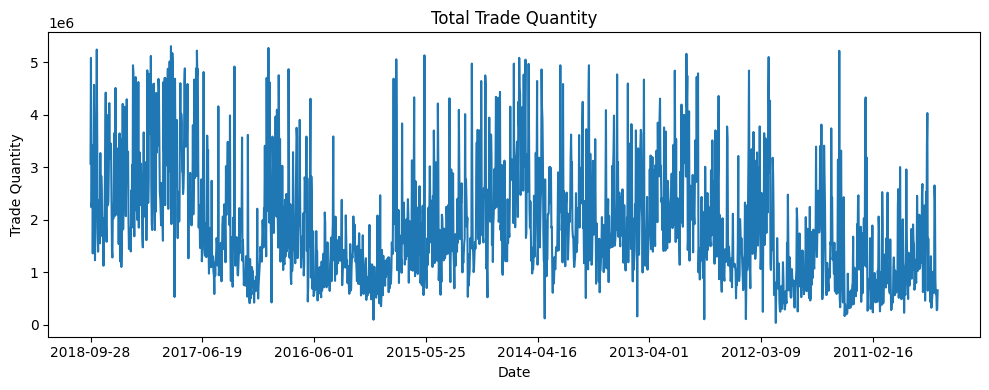

In [100]:
plt.figure(figsize=(10,4))

plt.subplot(1,1,1)
data['Total Trade Quantity'].plot()
plt.ylabel('Trade Quantity')
plt.title('Total Trade Quantity')

plt.tight_layout()

array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>]], dtype=object)

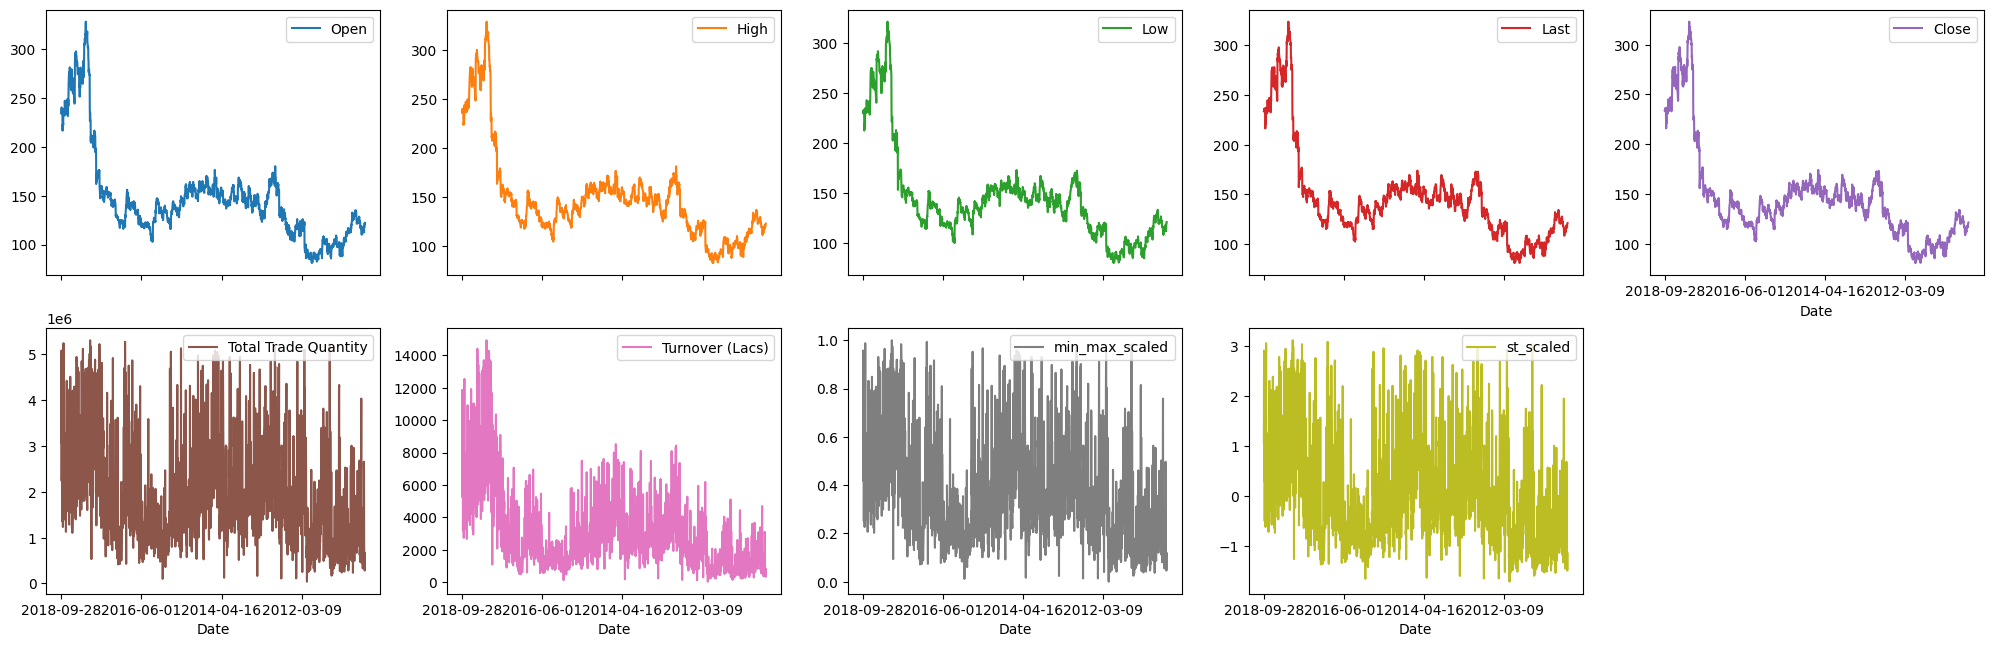

In [101]:
data.plot(kind='line',subplots=True,figsize=(25,20),layout=(5,5),use_index=True)

Moving Average : 
* A stock indicator commonly used in technical analysis, used to help smooth out price data by creating a constantly updated average price

How it is Calculated :
* Taking Average of Closing Price

Types of Moving Averages :
* Simple Moving Average
* Exponential Moving Average 

Why Moving Average is used?
* Traders and investors use moving averages to identify potential buy or sell signals. When the price of a stock or an index crosses above its moving average, it is considered a bullish signal, indicating that the stock may continue to rise. Conversely, when the price crosses below the moving average, it is considered a bearish signal, suggesting that the stock may continue to decline.

In [102]:
mov_avg_day = [10,20,50,100]

for ma in mov_avg_day:
    column_name = f"MA {ma} Days"
    data[column_name] = data['Close'].rolling(ma).mean()


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896 entries, 2018-09-28 to 2010-07-21
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  1896 non-null   float64
 1   High                  1896 non-null   float64
 2   Low                   1896 non-null   float64
 3   Last                  1896 non-null   float64
 4   Close                 1896 non-null   float64
 5   Total Trade Quantity  1896 non-null   int64  
 6   Turnover (Lacs)       1896 non-null   float64
 7   min_max_scaled        1896 non-null   float64
 8   st_scaled             1896 non-null   float64
 9   MA 10 Days            1887 non-null   float64
 10  MA 20 Days            1877 non-null   float64
 11  MA 50 Days            1847 non-null   float64
 12  MA 100 Days           1797 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 207.4+ KB


In [104]:
data.head()

Open    High     Low    Last   Close  Total Trade Quantity  \
Date                                                                       
2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   

            Turnover (Lacs)  min_max_scaled  st_scaled  MA 10 Days  \
Date                                                                 
2018-09-28          7162.35        0.575308   1.063756         NaN   
2018-09-27         11859.95        0.957469   2.904318         NaN   
2018-09-26          5248.60        0.417920   0.305744         NaN   
2018-09-25          5503.90        0.438511   0.404915         NaN   
2018-09-24          7999.55        0.642439   1.387070         NaN   

            MA 20 Days  MA 50 Days  MA 100 Days  
Date                                             
2018-09-28         NaN         NaN          NaN  
2018-09-27         NaN         NaN          NaN  
2018-09-26         NaN         NaN          NaN  
2018-09-25         NaN         NaN          NaN  
2018-09-24         NaN         NaN          NaN

In [105]:
data.isnull().sum()

Open                     0
High                     0
Low                      0
Last                     0
Close                    0
Total Trade Quantity     0
Turnover (Lacs)          0
min_max_scaled           0
st_scaled                0
MA 10 Days               9
MA 20 Days              19
MA 50 Days              49
MA 100 Days             99
dtype: int64

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896 entries, 2018-09-28 to 2010-07-21
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  1896 non-null   float64
 1   High                  1896 non-null   float64
 2   Low                   1896 non-null   float64
 3   Last                  1896 non-null   float64
 4   Close                 1896 non-null   float64
 5   Total Trade Quantity  1896 non-null   int64  
 6   Turnover (Lacs)       1896 non-null   float64
 7   min_max_scaled        1896 non-null   float64
 8   st_scaled             1896 non-null   float64
 9   MA 10 Days            1887 non-null   float64
 10  MA 20 Days            1877 non-null   float64
 11  MA 50 Days            1847 non-null   float64
 12  MA 100 Days           1797 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 207.4+ KB


In [107]:
data.dropna(axis=0,inplace=True)

In [108]:
data.head()

Open    High     Low    Last   Close  Total Trade Quantity  \
Date                                                                       
2018-04-20  285.95  288.80  283.65  286.00  286.30               2523492   
2018-04-19  286.00  288.65  283.60  285.55  286.20               2434183   
2018-04-18  282.30  287.45  279.25  285.35  284.10               4719061   
2018-04-16  274.00  280.20  272.55  279.40  279.65               3030999   
2018-04-13  274.00  277.35  271.75  275.70  275.50               2196800   

            Turnover (Lacs)  min_max_scaled  st_scaled  MA 10 Days  \
Date                                                                 
2018-04-20          7225.36        0.471569   0.564128     289.020   
2018-04-19          6966.56        0.454613   0.482467     288.860   
2018-04-18         13416.32        0.888401   2.571675     288.605   
2018-04-16          8371.24        0.567920   1.028173     287.295   
2018-04-13          6024.34        0.409546   0.265413     285.090   

            MA 20 Days  MA 50 Days  MA 100 Days  
Date                                             
2018-04-20    278.9475     271.267     254.7390  
2018-04-19    280.5325     271.486     255.2635  
2018-04-18    282.2275     271.842     255.7720  
2018-04-16    283.8525     272.010     256.2260  
2018-04-13    285.4500     271.974     256.6200

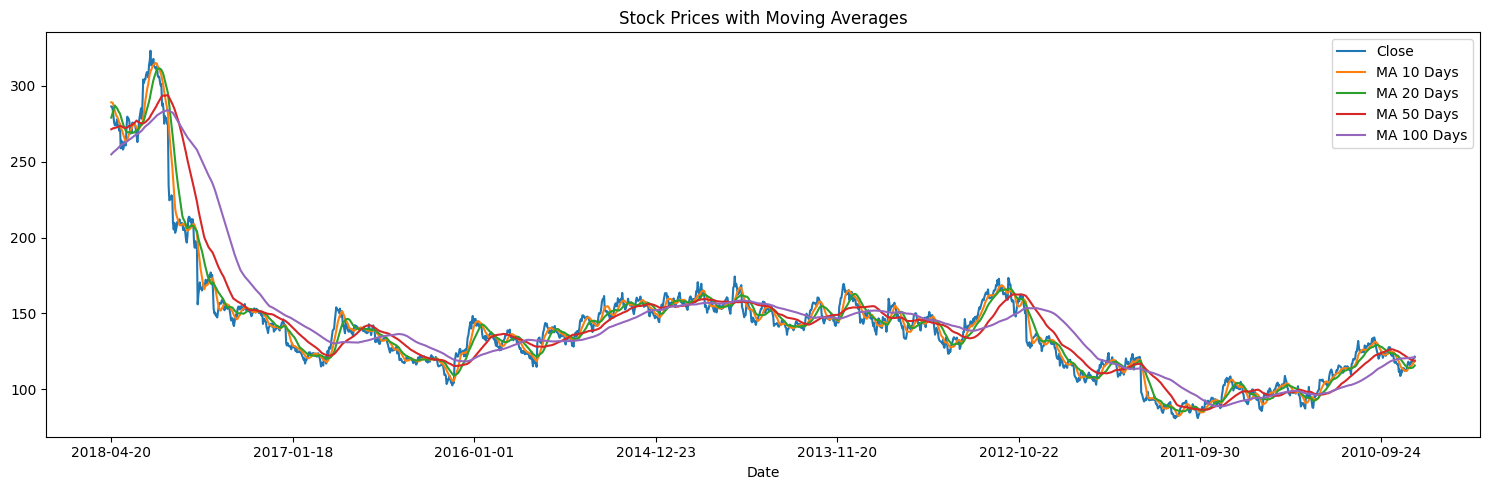

In [109]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_figheight(5)
fig.set_figwidth(15)

data[['Close','MA 10 Days', 'MA 20 Days','MA 50 Days','MA 100 Days']].plot(ax=axes)
axes.set_title('Stock Prices with Moving Averages')

plt.tight_layout()
plt.show()

In the The Graph Orange, Green and Red are Perfect to Measure the Moving Average 

<Axes: >

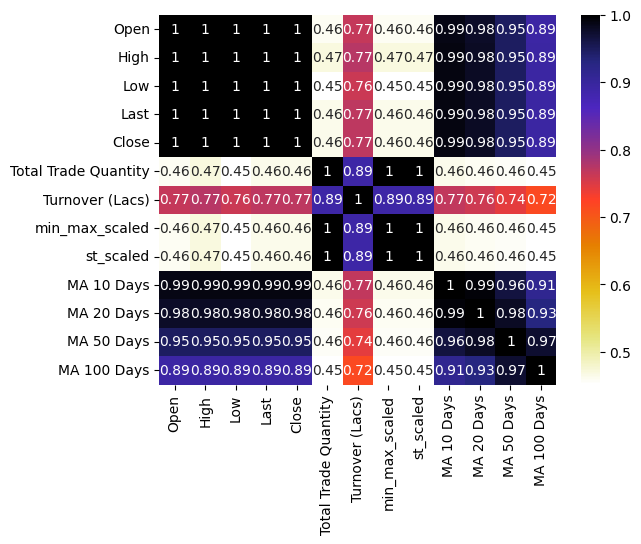

In [110]:
correlation = data.corr()

sns.heatmap(correlation,cmap = "CMRmap_r",annot=True)

## Daily Return of the Stock on Average

In [111]:
data['Daily return'] = data['Close'].pct_change()

C:\Users\Hunain\AppData\Local\Temp\ipykernel_6640\3930271782.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['{:.0f}%'.format(x * 100) for x in axes.get_yticks()])


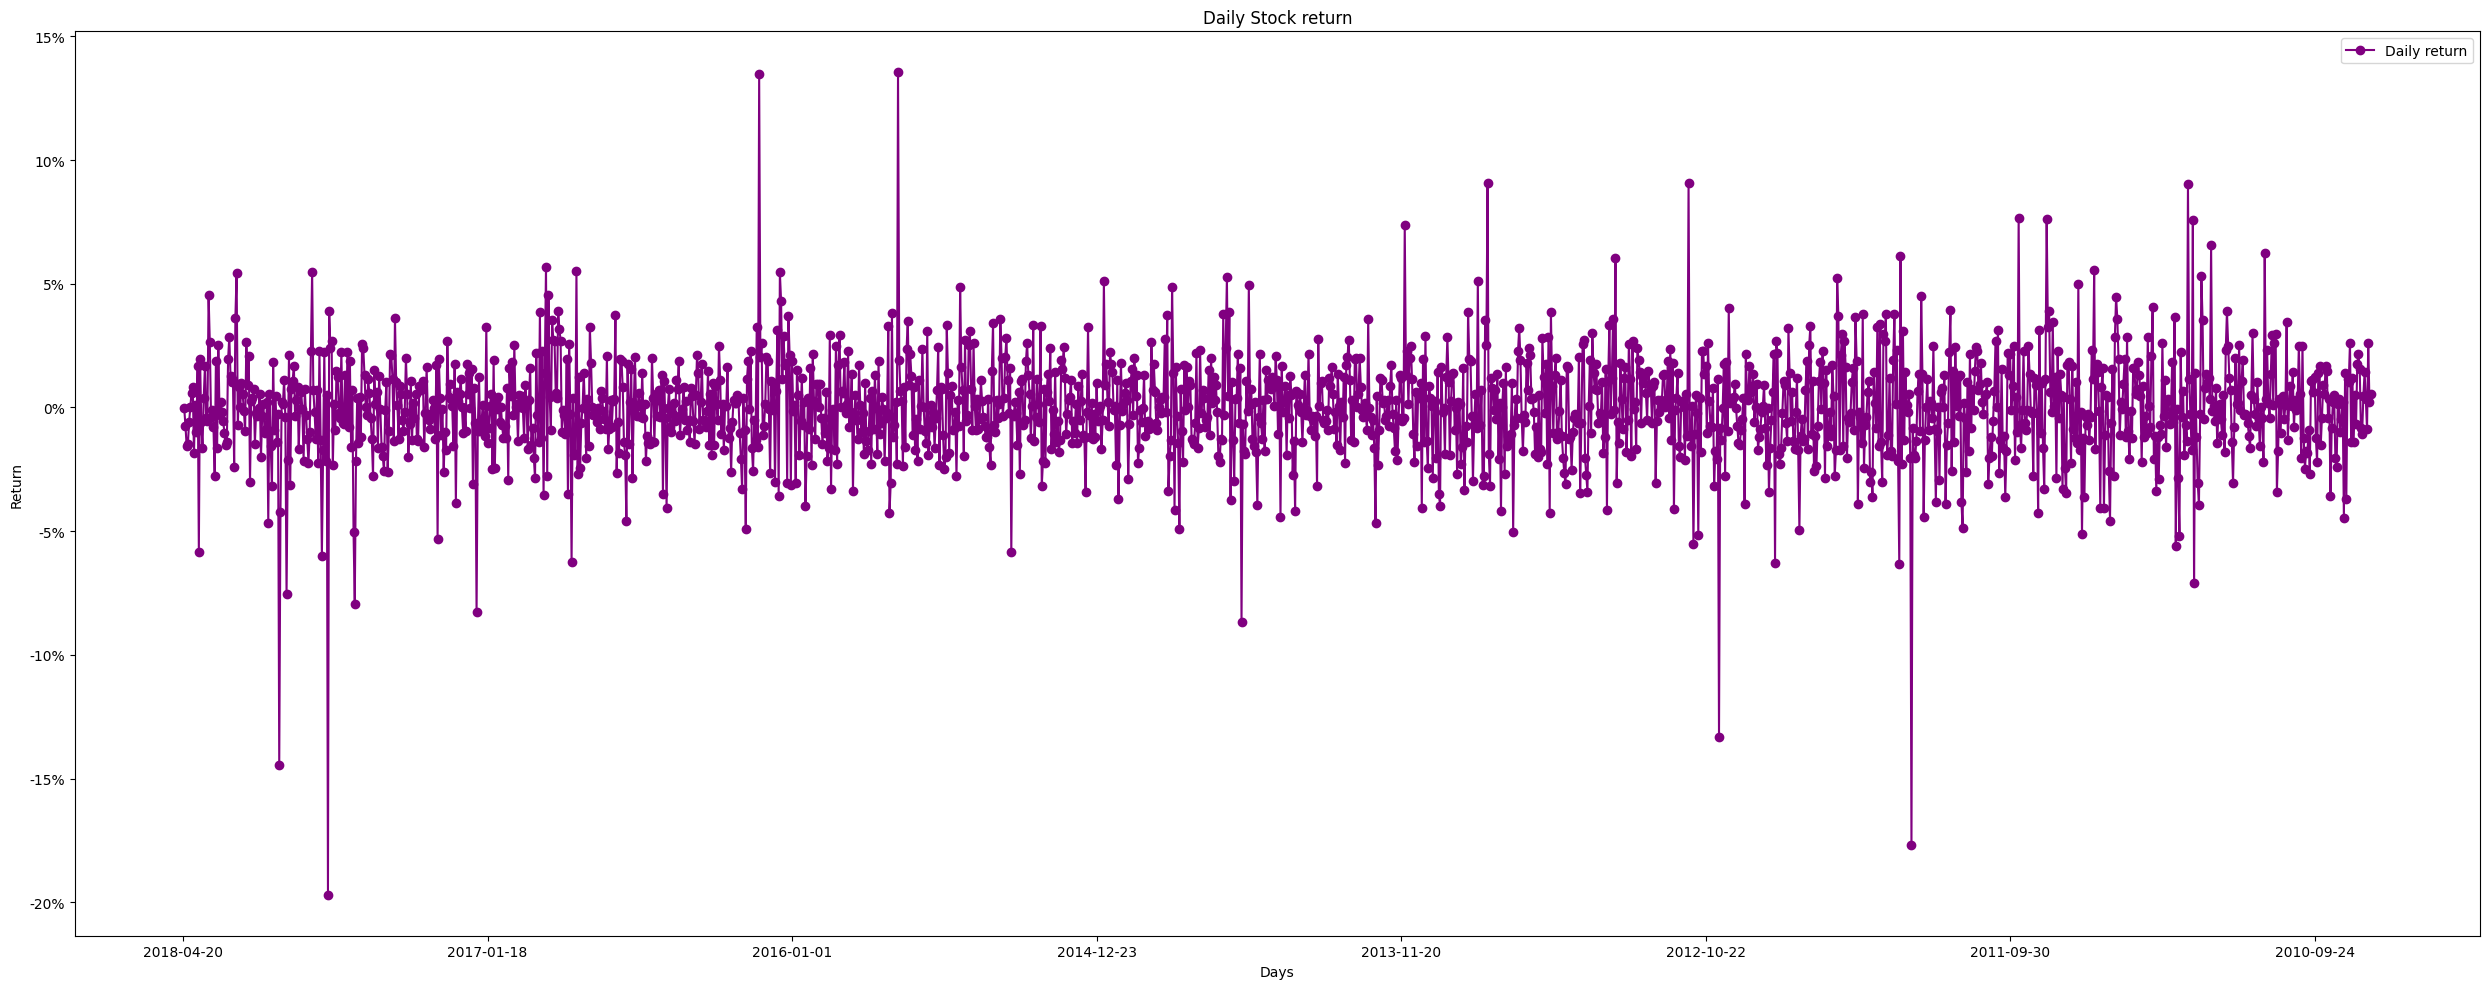

In [112]:
fig,axes=plt.subplots(nrows=1,ncols=1)
fig.set_figheight(10)
fig.set_figwidth(25)
fig.patch.set_facecolor('w')

data['Daily return'].plot(ax=axes,legend=True,linestyle='-',marker='o',color='purple')
axes.set_title("Daily Stock return")
axes.set_xlabel("Days")
axes.set_ylabel("Return")

# Set the y-axis tick labels as percentages
axes.set_yticklabels(['{:.0f}%'.format(x * 100) for x in axes.get_yticks()])

plt.tight_layout()
plt.legend()
plt.show()

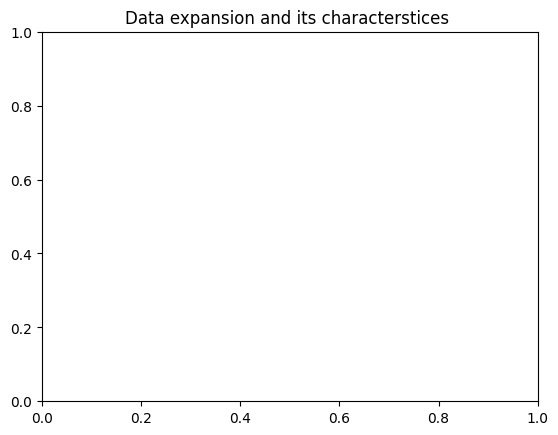

<Figure size 1000x1000 with 0 Axes>

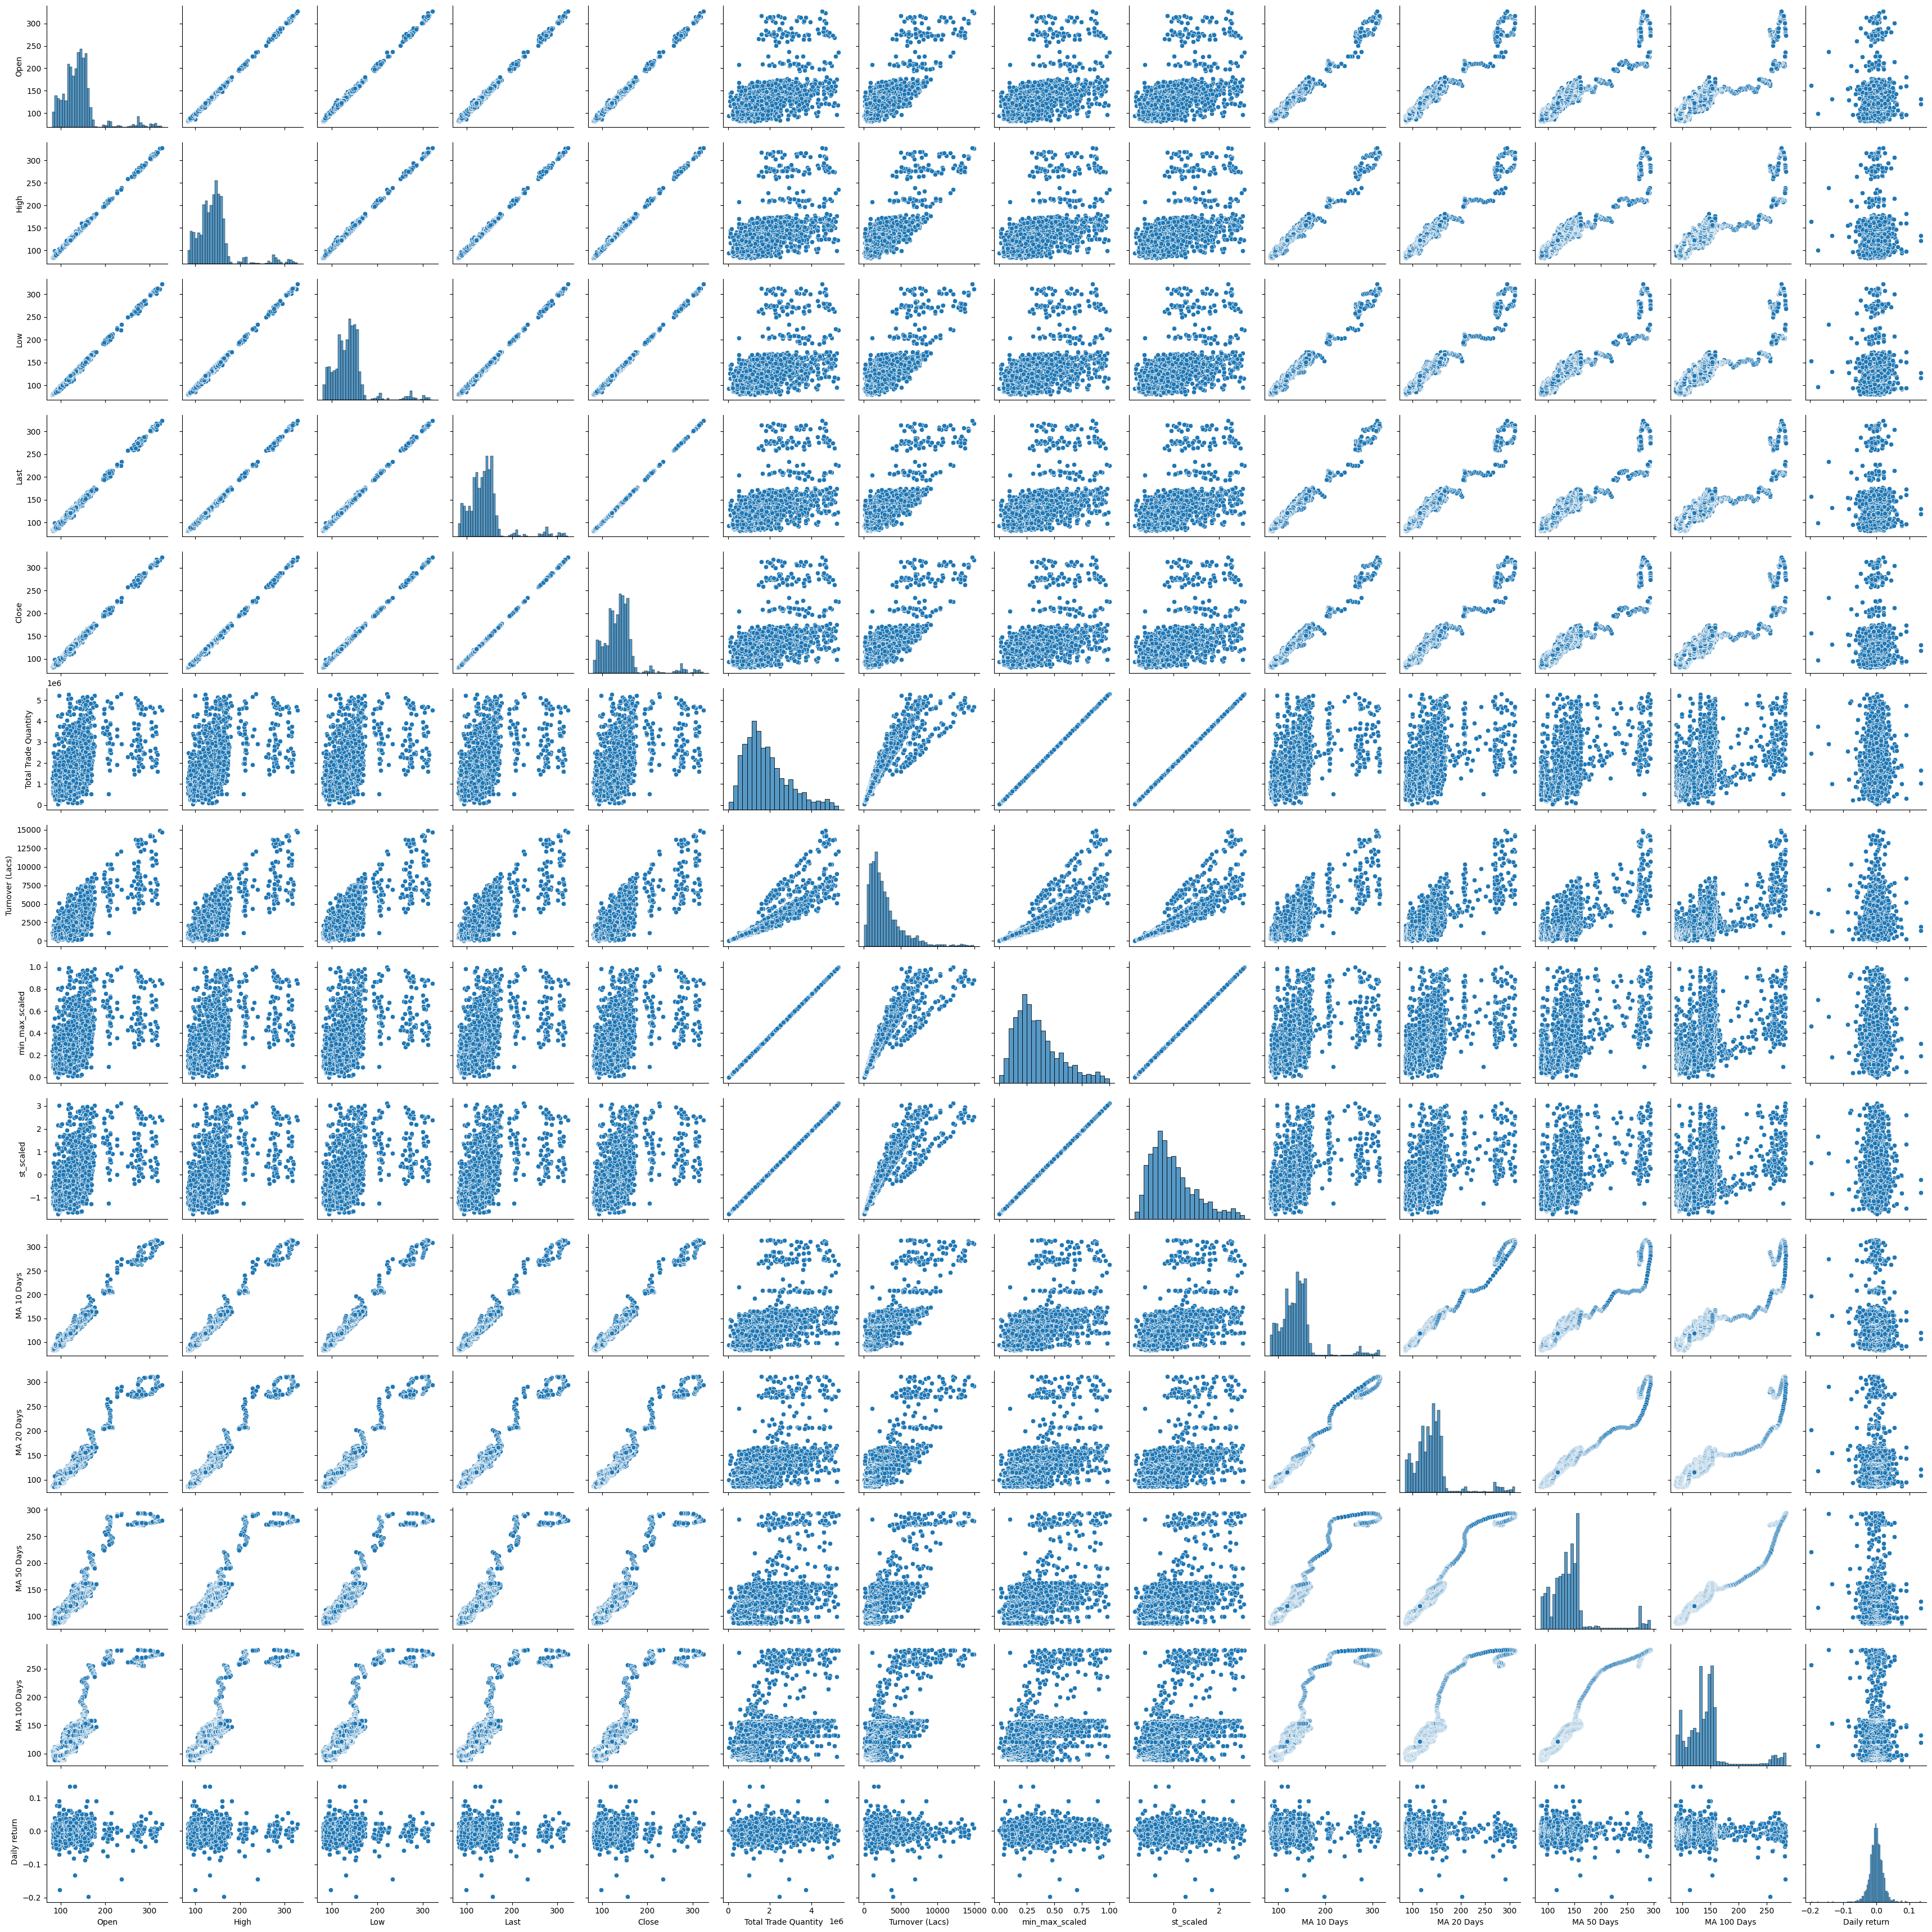

In [113]:
plt.title("Data expansion and its characterstices ")
plt.figure(figsize=(10,10))
sns.pairplot(data)

Quantifying Risk

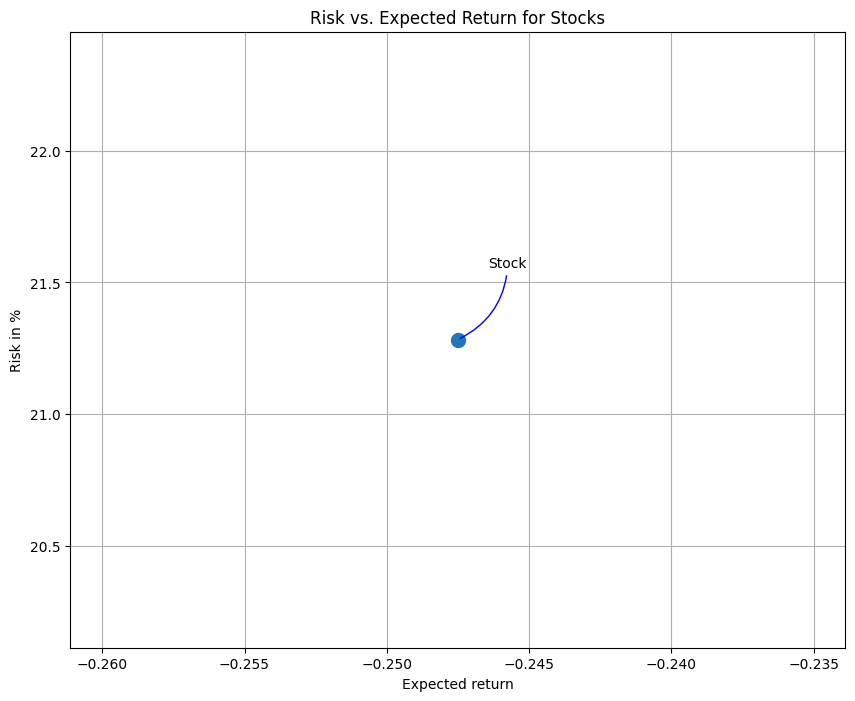

In [114]:
# Calculate the daily returns for Apple stock
rets = data['Daily return'].dropna()

# convert returns to percentag 
rets=rets*1000

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=100)
plt.xlabel('Expected return')
plt.ylabel('Risk in %')



plt.annotate('Stock', xy=(rets.mean(), rets.std()), xytext=(50, 50), textcoords='offset points',
             ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.grid(True)
plt.title('Risk vs. Expected Return for Stocks')
plt.show()

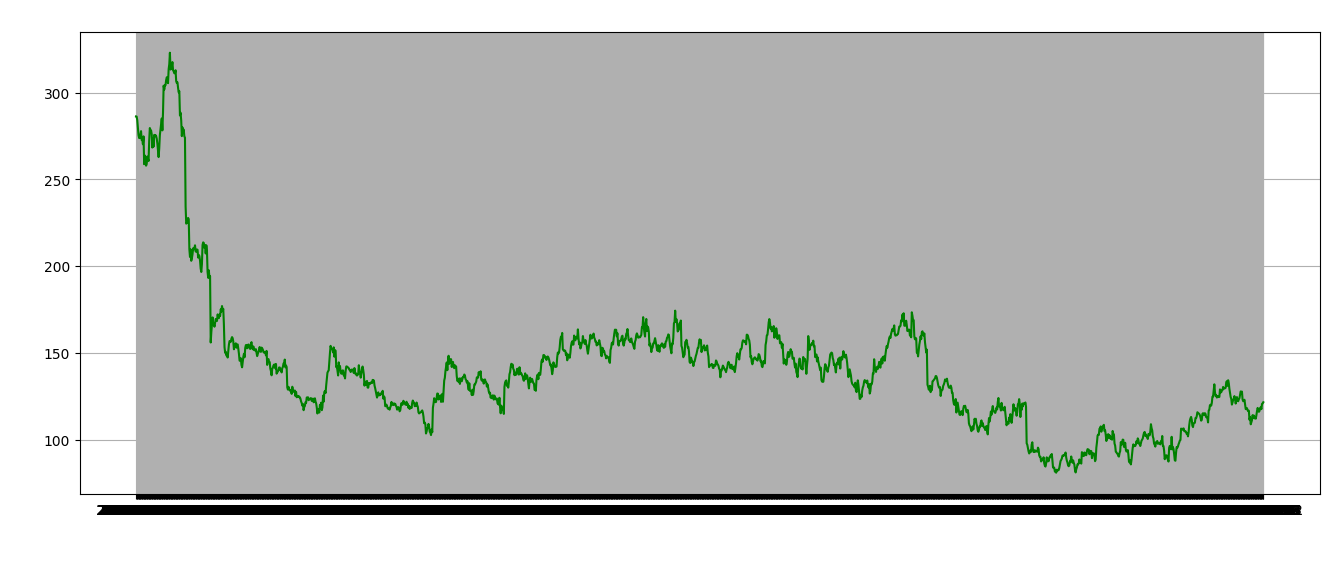

In [115]:
plt.figure(figsize=(16,6))
plt.title(" Clsoing price history",color='white')
plt.plot(data['Close'],color="green")

plt.xlabel("year",fontsize=20,color='white')

plt.grid(True)
plt.ylabel("Closing price USD",fontsize=20,color="White")

# plt.gca().set_facecolor('black')
plt.show()

In [116]:
data2 = data.filter(['Close'])
dataset = data2.values

training_data_len = int(np.ceil(len(dataset) * .95))

training_data_len

1708

In [117]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.84837843],
       [0.8479653 ],
       [0.8392894 ],
       ...,
       [0.1640157 ],
       [0.16504854],
       [0.16773394]])

In [118]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.84837843, 0.8479653 , 0.8392894 , 0.82090477, 0.80375955,
       0.79694278, 0.79694278, 0.80375955, 0.81326172, 0.7921917 ,
       0.79343111, 0.78206982, 0.80086759, 0.73455898, 0.75542243,
       0.74881223, 0.7310473 , 0.73497211, 0.75294361, 0.74819252,
       0.74220202, 0.79095228, 0.8206982 , 0.81615369, 0.81491427,
       0.80603181, 0.7742202 , 0.79508366, 0.77649246, 0.80437926,
       0.80107416, 0.80375955, 0.80169386, 0.7954968 , 0.78392894,
       0.76699029, 0.75149762, 0.77256765, 0.80417269, 0.81842595,
       0.83040694, 0.84342078, 0.81512084, 0.85684776, 0.92150382,
       0.91241479, 0.92253667, 0.92253667, 0.93472423, 0.941541  ,
       0.93947532, 0.92749432, 0.96095848, 0.97273291, 1.        ,
       0.95992564, 0.96323074, 0.96818839, 0.97769056, 0.95847965])]
[0.9555876884941127]

[array([0.84837843, 0.8479653 , 0.8392894 , 0.82090477, 0.80375955,
       0.79694278, 0.79694278, 0.80375955, 0.81326172, 0.7921917 ,
       0.79343111, 0.78206982, 0.800

In [119]:
model = Sequential()
model.add(LSTM(128, return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics=['accuracy'])

model.fit(x_train,y_train,batch_size=1,epochs = 4)

Epoch 1/4
1648/1648 [==============================] - 64s 35ms/step - loss: 0.0013 - accuracy: 6.0680e-04
Epoch 2/4
1648/1648 [==============================] - 60s 36ms/step - loss: 4.8726e-04 - accuracy: 6.0680e-04
Epoch 3/4
1648/1648 [==============================] - 60s 36ms/step - loss: 5.0128e-04 - accuracy: 6.0680e-04
Epoch 4/4
1648/1648 [==============================] - 60s 37ms/step - loss: 4.1902e-04 - accuracy: 6.0680e-04


In [122]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3/3 [==============================] - 0s 41ms/step


4.7423049487885995

C:\Users\Hunain\AppData\Local\Temp\ipykernel_6640\1141653528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


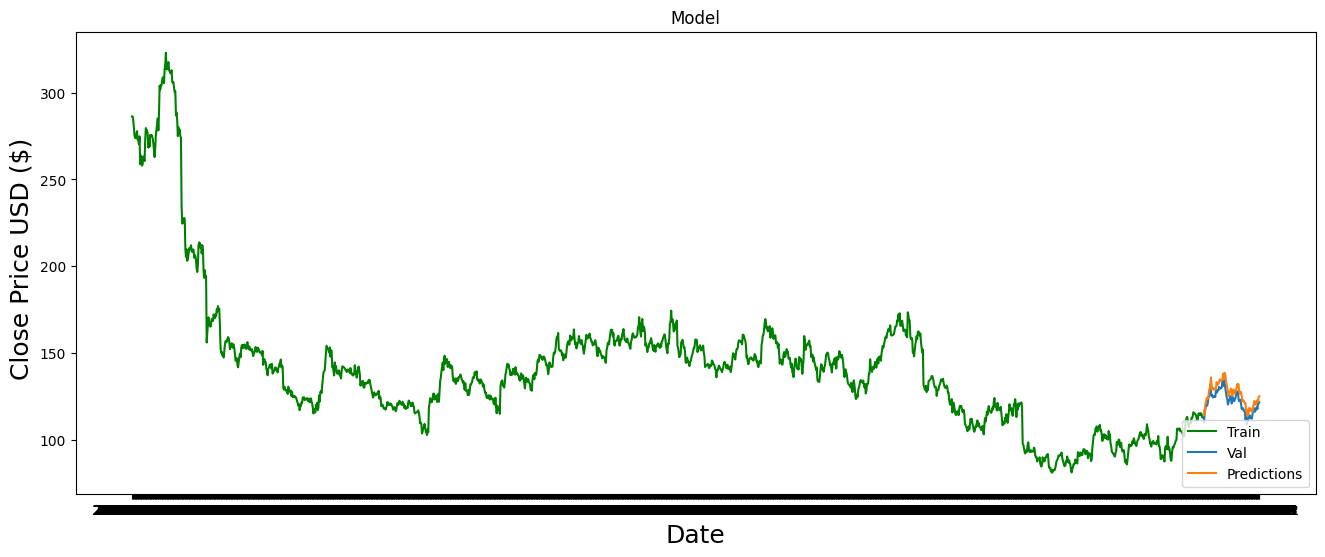

In [124]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel(' Close Price USD ($)', fontsize=18)
plt.plot(train['Close'],color='green')
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()